In [1]:
import torch.nn as nn
import numpy as np
import torch

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
from torch.utils.data import DataLoader, TensorDataset
from torch import from_numpy

In [83]:
%matplotlib inline

In [6]:
iris = load_iris()

In [7]:
X = iris['data']

In [8]:
y = iris['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.35, random_state = 1)

In [10]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

In [11]:
X_train_norm = torch.from_numpy(X_train_norm).float()

In [12]:
y_train = torch.from_numpy(y_train)

In [13]:
train_ds = TensorDataset(X_train_norm, y_train)

In [14]:
batch_size = 1

In [15]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [16]:
torch.manual_seed(1)

In [17]:
batch_size = 2

In [18]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [19]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return x

In [20]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [21]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [22]:
x_batch, y_batch = train_dl.dataset[0]

In [23]:
x_batch.shape, y_batch.shape

(torch.Size([4]), torch.Size([]))

In [24]:
model(x_batch)

tensor([-0.0204,  0.5273, -0.0238], grad_fn=<ViewBackward0>)

In [25]:
torch.argmax(model(x_batch), dim=0)

tensor(1)

In [26]:
y_batch.item()

2

In [27]:
num_epoch = 100
loss_hist = [0] * num_epoch
accuracy_hist = [0] * num_epoch
for epoch in range(num_epoch):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
        

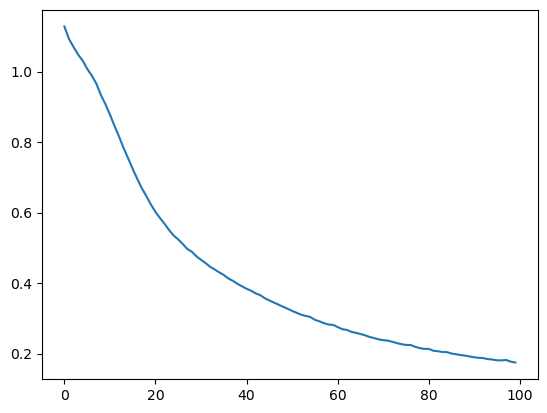

In [87]:
plt.plot(loss_hist)

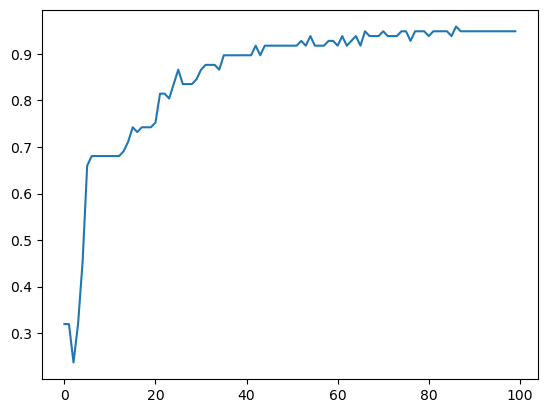

In [124]:
plt.plot(accuracy_hist)

In [126]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

In [128]:
X_test_norm = torch.from_numpy(X_test_norm).float()

In [130]:
y_test = torch.from_numpy(y_test)

In [132]:
pred_test = model(X_test_norm)

In [134]:
correct = (torch.argmax(pred_test, dim=1) == y_test).float()

In [136]:
accuracy = correct.mean()

In [140]:
accuracy.item()

0.9811320900917053